In [129]:
#Logistic Regression
import numpy as np
import matplotlib.pyplot as plt
plt.ioff()

In [130]:
X = np.random.randn(100, 2)

In [131]:
M = .3
C = .1
cls = np.array(M*X[:,0] - X[:,1] + C > 0, dtype=np.int)

In [132]:
cls

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1])

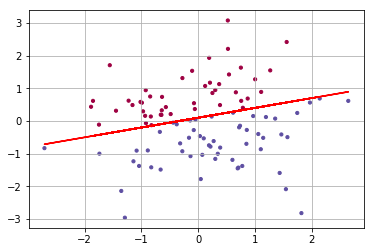

In [133]:
plt.scatter(X[:,0], X[:, 1], s=10, c=cls, cmap=plt.cm.Spectral)
plt.plot(X[:,0], M*X[:,0]+C, 'r')
plt.grid()

In [143]:

class LogisticRegression:
    def __init__(self, data, labels, num_steps=1e4, learning_rate=.0001):
        self.data = data
        self.labels = labels
        self.num_steps = num_steps
        self.learning_rate = learning_rate
        self.num_samples = self.data.shape[0]
        self.data_dim = self.data.shape[1]
        self.weights = {'W': np.random.randn(self.data_dim, ), 'b': np.zeros(1)}
        
    @staticmethod
    def sigmoid(z):
        return 1./(1+np.exp(-z))

    def forward_prop(self):
        z = self.data.dot(self.weights['W']) + self.weights['b']
        y_hat = self.sigmoid(z)
        y = self.labels
        N = self.num_samples
        loss = -np.sum(y*np.log(y_hat) - (1-y)*np.log(1-y_hat))/N
        return y_hat, loss

    def back_prop(self, y_hat):
        dz = y_hat - self.labels
        dW = self.data.T.dot(dz)
        db = np.mean(dz, axis=0)
        return {'dW': dW, 'db': db}

    def fit(self):
        i = 0
        while i<self.num_steps:
            Y_hat, loss = self.forward_prop()
            dtheta = self.back_prop(Y_hat)
            dW, db = dtheta['dW'], dtheta['db']
            self.weights['W']-=self.learning_rate*dW
            self.weights['b']-=self.learning_rate*db
            if i%100==0:
                print(self.weights)
                print('Loss=%f at %ith iteration' %(loss, i), Y_hat[0])
            i+=1

    def predict(self, x):
        return self.weights['W']*x + self.weights['b']
    
    @staticmethod
    def accuracy(y_true, y_pred):
        pass

In [144]:
regressor = LogisticRegression(data=X, labels=cls)

In [145]:
regressor.fit()

{'W': array([-0.1974961 ,  1.14525196]), 'b': array([5.50082653e-06])}
Loss=0.102721 at 0th iteration 0.4381085652880429
{'W': array([-0.04781239,  0.55580093]), 'b': array([0.00054896])}
Loss=0.080664 at 100th iteration 0.4618540978994204
{'W': array([0.07967028, 0.08017419]), 'b': array([0.0010612])}
Loss=0.067762 at 200th iteration 0.4800634588573835
{'W': array([ 0.18629247, -0.28214356]), 'b': array([0.00153356])}
Loss=0.062432 at 300th iteration 0.4923986500992575
{'W': array([ 0.27712716, -0.56181662]), 'b': array([0.00198073])}
Loss=0.060568 at 400th iteration 0.5005055190876522
{'W': array([ 0.35629251, -0.78722293]), 'b': array([0.00241594])}
Loss=0.059966 at 500th iteration 0.5060494015582969
{'W': array([ 0.42635329, -0.97610927]), 'b': array([0.00284571])}
Loss=0.059841 at 600th iteration 0.5100798988832295
{'W': array([ 0.48902978, -1.13911137]), 'b': array([0.00327304])}
Loss=0.059911 at 700th iteration 0.5131957535610773
{'W': array([ 0.54558056, -1.2828801 ]), 'b': arr

{'W': array([ 1.59585144, -4.18937608]), 'b': array([0.03245033])}
Loss=0.065335 at 7400th iteration 0.5869359904310155
{'W': array([ 1.60248906, -4.21056044]), 'b': array([0.03289174])}
Loss=0.065358 at 7500th iteration 0.587667393292458
{'W': array([ 1.60904561, -4.23151225]), 'b': array([0.03333323])}
Loss=0.065380 at 7600th iteration 0.5883929188020733
{'W': array([ 1.61552319, -4.252237  ]), 'b': array([0.03377481])}
Loss=0.065401 at 7700th iteration 0.5891126721831211
{'W': array([ 1.6219238, -4.27274  ]), 'b': array([0.03421647])}
Loss=0.065422 at 7800th iteration 0.5898267560393368
{'W': array([ 1.62824939, -4.29302636]), 'b': array([0.0346582])}
Loss=0.065443 at 7900th iteration 0.5905352704237606
{'W': array([ 1.63450183, -4.31310099]), 'b': array([0.03510001])}
Loss=0.065463 at 8000th iteration 0.5912383129066362
{'W': array([ 1.6406829 , -4.33296866]), 'b': array([0.03554189])}
Loss=0.065482 at 8100th iteration 0.5919359786422567
{'W': array([ 1.64679434, -4.35263395]), 'b'